In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('mean_pixel_dist_with_control.csv')

In [5]:
y1,y2,std1,std2 = df.y1.values, df.y2.values, df.std1.values, df.std2.values

In [6]:
scale = 320
y1 /= scale
y2 /= scale
std1 /= scale
std2 /= scale

In [7]:
from scipy.interpolate import interp1d
fy1 = interp1d(range(30), y1, kind='cubic')
fstd1 = interp1d(range(30), std1, kind='cubic')
fy2 = interp1d(range(30), y2, kind='cubic')
fstd2 = interp1d(range(30), std2, kind='cubic')

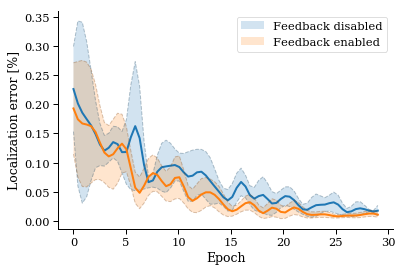

In [28]:
import seaborn as sns
import matplotlib.colors
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context("paper", font_scale=1.3)  

plt.figure()
ax = plt.gca()
ax.set_xlabel('Epoch')
ax.set_ylabel('Localization error [%]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

def darker(c):
    return [x*0.5 for x in c]

xnew = np.linspace(0,29,70)
c = matplotlib.colors.to_rgb(plt.plot(xnew, fy1(xnew), linewidth=2)[0].get_color())
plt.fill_between(xnew, fy1(xnew)-fstd1(xnew), fy1(xnew)+fstd1(xnew), alpha=0.2, label='Feedback disabled')
plt.plot(xnew, fy1(xnew)-fstd1(xnew), '--', alpha=0.3, color=darker(c), linewidth=1)
plt.plot(xnew, fy1(xnew)+fstd1(xnew), '--',alpha=0.3, color=darker(c), linewidth=1)
c = matplotlib.colors.to_rgb(plt.plot(xnew, fy2(xnew), linewidth=2)[0].get_color())
plt.fill_between(xnew, fy2(xnew)-fstd2(xnew), fy2(xnew)+fstd2(xnew), alpha=0.2, label='Feedback enabled')
plt.plot(xnew, fy2(xnew)-fstd2(xnew), '--', alpha=0.3, color=darker(c), linewidth=1)
plt.plot(xnew, fy2(xnew)+fstd2(xnew), '--',alpha=0.3, color=darker(c), linewidth=1)
plt.legend()
plt.savefig('control.pdf')